###### Import the required libraries.

In [24]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL

In [25]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

In [26]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Median Value of Owner-Occupied Homes')

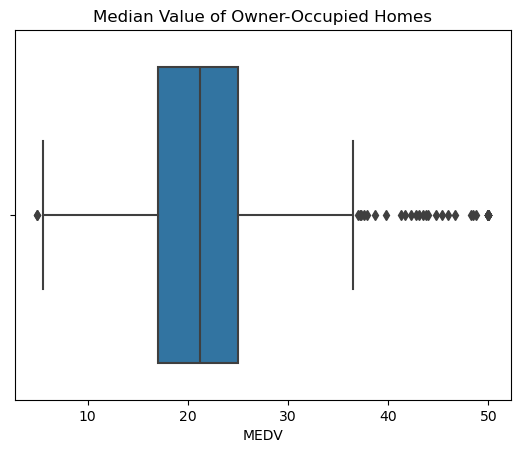

In [27]:
# Create a boxplot for median value of owner-occupied homes
sns.boxplot(x='MEDV', data=df).set_title('Median Value of Owner-Occupied Homes')

In [28]:
df['MEDV'].describe().T

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

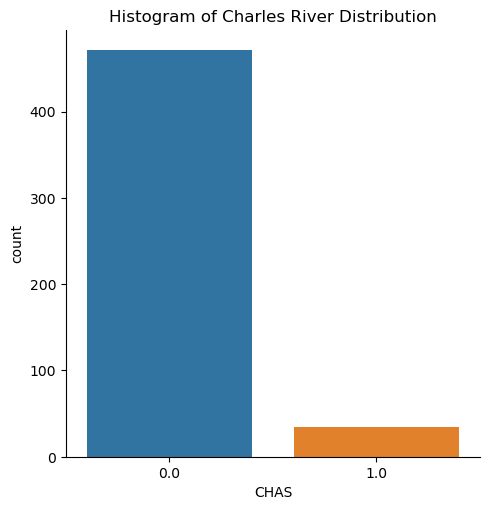

In [29]:
# Create a histogram for the Charles river variable
sns.catplot(x='CHAS', kind='count', data=df).set(title='Histogram of Charles River Distribution')

Text(0.5, 1.0, 'Median Value of House Age Group')

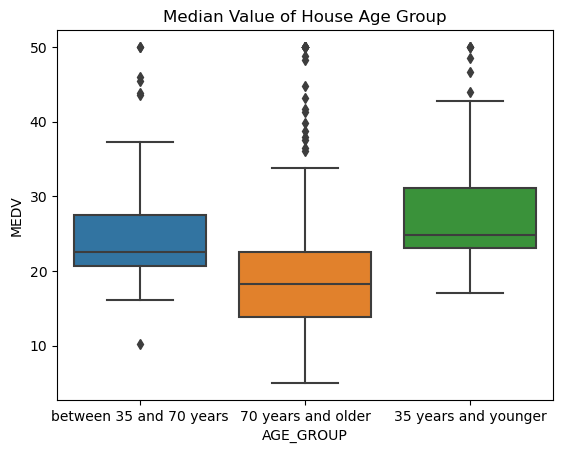

In [30]:
# Create a boxplot for the MEDV variable vs the AGE variable.
# Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 years and 70 years and older.

df.loc[(df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
df.loc[(df['AGE'] > 35)&(df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
df.loc[(df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df).set_title('Median Value of House Age Group')

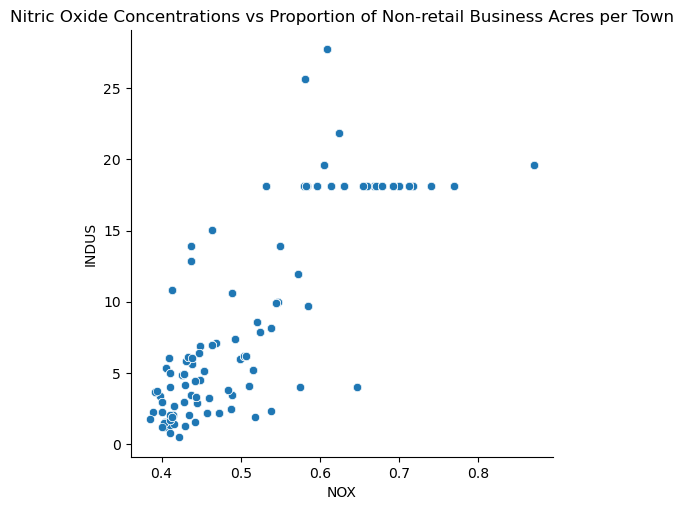

In [31]:
# Create a scatter plot to show the relationship between Nitric oxide concentrations 
# and the proportion of non-retail business acres per town.

sns.relplot(x='NOX', y='INDUS', data=boston_df).set(title='Nitric Oxide Concentrations vs Proportion of Non-retail Business Acres per Town')

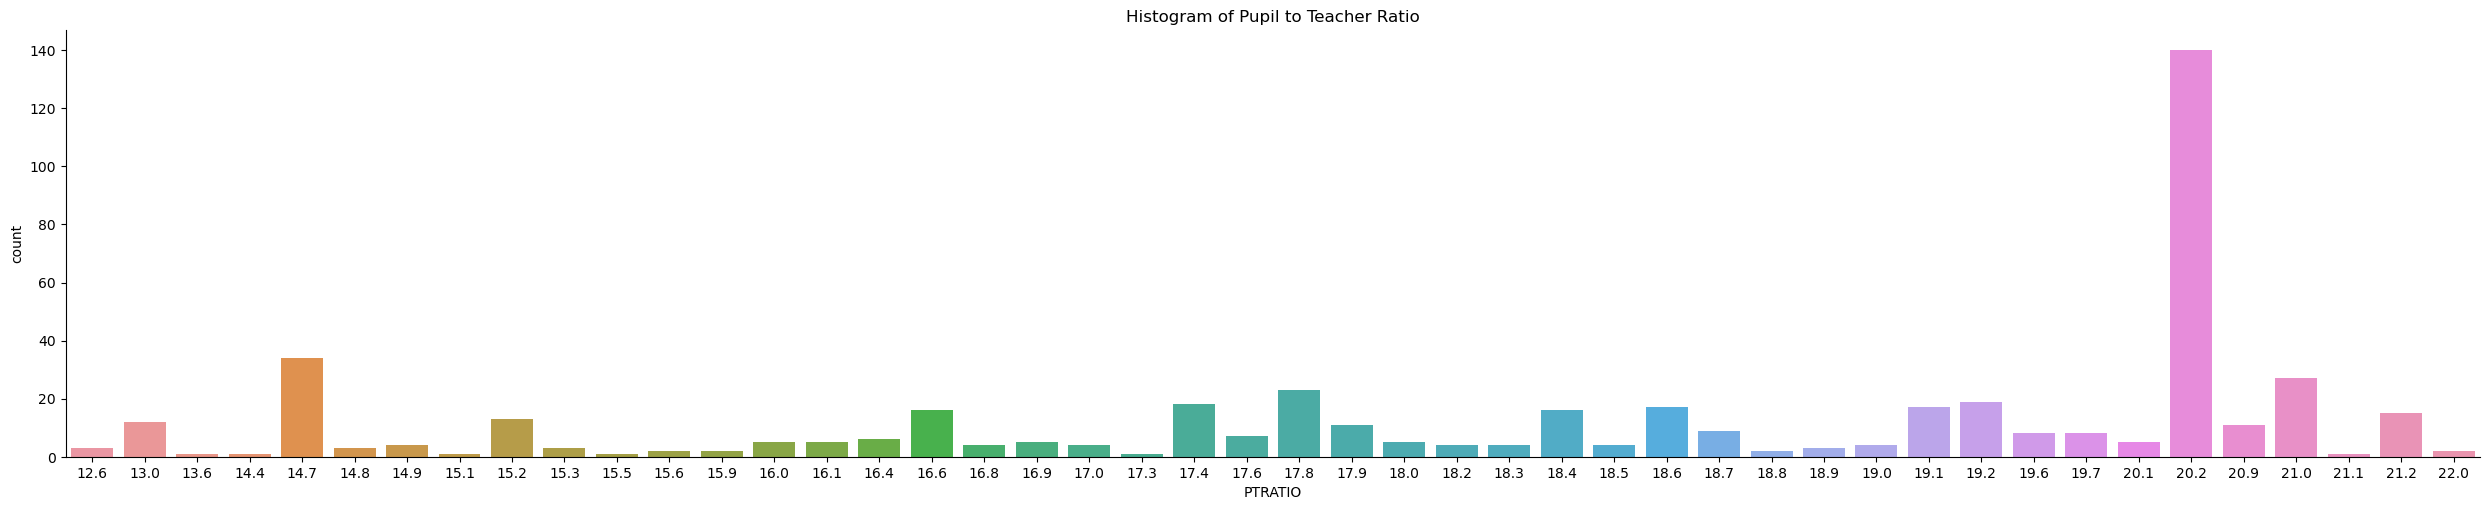

In [32]:
# Create a histogram for the pupil to teacher ratio variable
sns.catplot(x='PTRATIO', kind='count', data=df, aspect=5).set(title='Histogram of Pupil to Teacher Ratio')

Text(0.5, 1.0, 'Median Value of Houses Bounded by the Charles River')

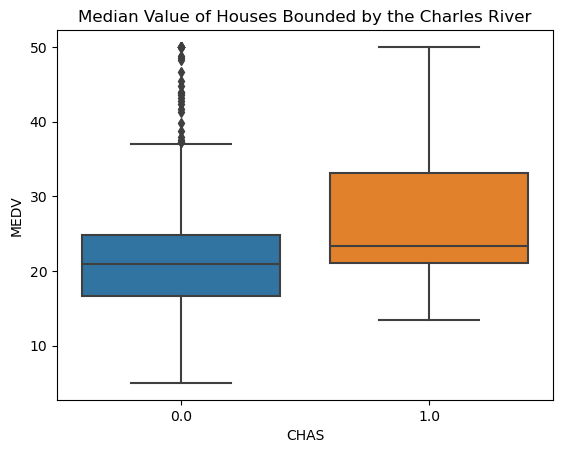

In [33]:
# Question 1: Is there a significant difference in the median value of houses bounded by the Charles river or not?
sns.boxplot(x='CHAS', y='MEDV', data=df).set_title('Median Value of Houses Bounded by the Charles River')

##### H0:The median value of houses bounded by the Charles River and not bounded by the river is the same.

##### H1:There is a difference in median value of houses bounded by Charles River and not bounded by the river.

##### Conduct a T-test

In [34]:
scipy.stats.ttest_ind(df[df['CHAS'] == 0]['MEDV'],df[df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

##### Since the p-value is less than 0.05, we can reject the null hypothesis as there is sufficient evidence that the median value of houses bounded by the Charles River differs from the median value of houses not bounded by the river.

Text(0.5, 1.0, 'Median Value of Houses Based on its Age Group')

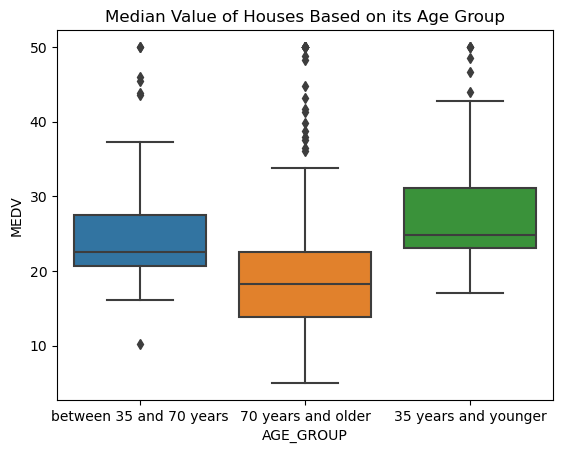

In [40]:
# Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df).set_title('Median Value of Houses Based on its Age Group')

##### H0 : There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940.

##### H1: There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940.

##### Test for equality of variance

In [41]:
scipy.stats.f_oneway(df[df['AGE_GROUP'] == '35 years and younger']['MEDV'], 
                    df[df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                    df[df['AGE_GROUP'] == '70 years and older']['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

##### Since the p-value is less than 0.05, we can reject the null hypothesis as there is sufficient evidence that at least one of the age group's median values of houses is different.

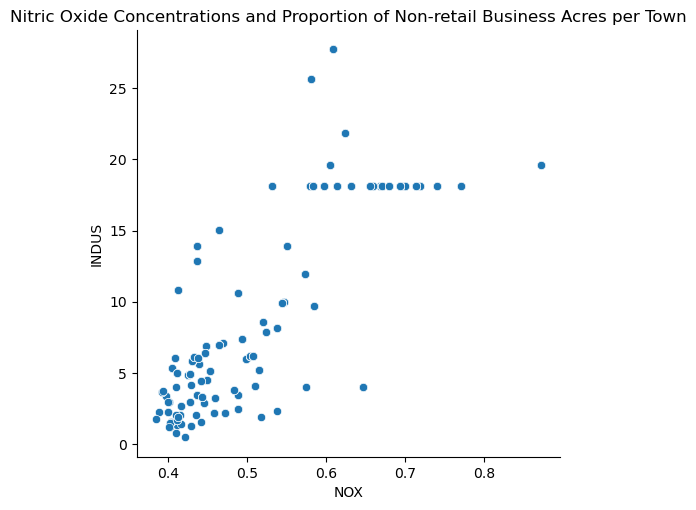

In [42]:
# Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations 
# and proportion of non-retail business acres per town?

sns.relplot(x='NOX', y='INDUS', data=df).set(title='Nitric Oxide Concentrations and Proportion of Non-retail Business Acres per Town')

##### H0 : There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

##### H1 : There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

##### Conduct a pearson correlation test

In [43]:
scipy.stats.pearsonr(df['NOX'],df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

##### Since the p-value is less than 0.05, we can reject the null hypothesis as there is sufficient evidence that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

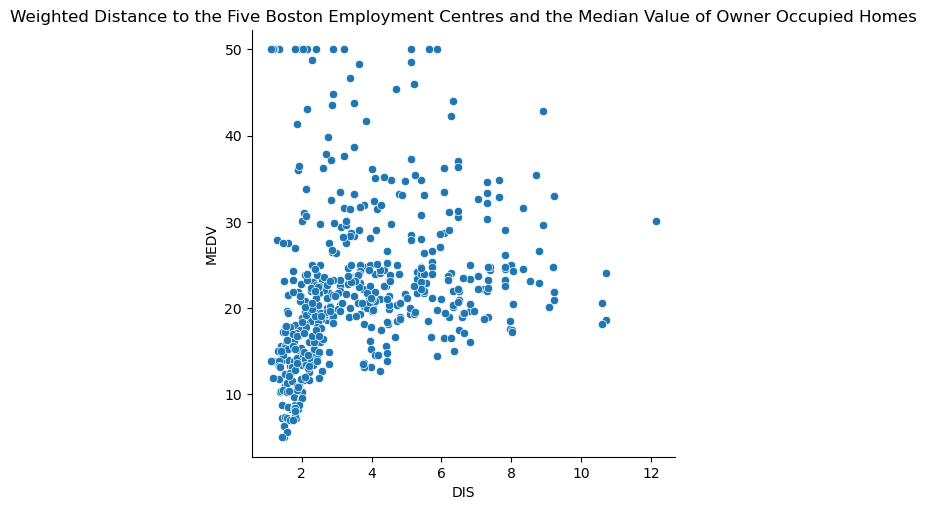

In [44]:
# Question 4: What is the impact of an additional weighted distance to the five Boston 
# employment centres on the median value of owner occupied homes?

sns.relplot(x='DIS', y='MEDV', data=df).set(title='Weighted Distance to the Five Boston Employment Centres and the Median Value of Owner Occupied Homes')

##### H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

##### H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

##### Conduct a pearson correlation test

In [45]:
scipy.stats.pearsonr(df['DIS'],df['MEDV'])

PearsonRResult(statistic=0.24992873408590396, pvalue=1.2066117273371067e-08)

##### Since the p-value is less than 0.05, we can reject the null hypothesis as there is sufficient evidence that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.